# Introduction
The walmart data set contains 8 features and they are:
1. Store Number
2. Date
3. Weekly Sales (in USD)
4. Holiday Flag (was there a holiday during the week)
5. Temperature (appears to be in Fahrenheit)
6. Fuel Price (USD/gal.)
7. CPI (Consumer Price Index - A representative metric based on commonly purchased goods)
8. Unemployment (Unemployment Rate - Looks to be a local unemployment rate or synthesized because on 05-02-2010 the national unemployment rate was 9.7%, but the dataset gives a value of 8.106% for the same date at store 1 and each store has a different unemployment rate)

We want to understand which, if any, of these metrics has an effect on weekly sales. Therefore, the target will likely be weekly sales.


# Overview

0. Set up environment
1. Cursory Analysis:
    1. Load data and view the raw data set.
    2. Check the distributions.
    3. Check the data types.
    4. Convert 'Date' feature to datetime object.
    5. Check for missing values.
    6. Check for 'inf' values.
2. Plot data:
   1. Plot weekly sales numbers.
   2. Bar Plot Holiday sales numbers.
   3. Scatter plot Weekly_Sales vs Unemployment and vs Fuel_Price
       1. Check for Data Leakage in Unemployment and Fuel_Price (among others)
       2. Scatter plot of Weekly_Sales vs Unemployment
       3. Scatter plot of Weekly_Sales vs Fuel Price
       4. Scatter plot of Weekly_Sales vs CPI
3. Check for Data Leakage
   1. Check Correlation Between Target and Features
   2. Check Feature to Feature Correlations
   3. Check Time-Lagged Relationships
4. Build Models
   1. Set Up
   2. Random Forest
5. Classifying Stores
   1. Weekly_Sales vs Unemployment

# 0. Set up environment

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

fname = '/kaggle/input/walmart-sales/Walmart_Sales.csv'

/kaggle/input/walmart-sales/Walmart_Sales.csv


# 1. Cursory Analysis

## 1.1 Load data and view raw data set

In [ ]:
df = pd.read_csv(fname)
df.head()

## 1.2 Check distributions

In [ ]:
df.describe()

## 1.3 Check the datatypes

In [ ]:
print(df.columns)
df.dtypes

## 1.4 Check for missing values.

In [ ]:
df.isna().sum()

## 1.5 Convert 'Date' to a datetime object

In [ ]:
#Convert from object to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day'] = df['Date'].dt.day
df['week'] = df['Date'].dt.isocalendar().week

df.head()

## 1.6 Check for infinite values

In [ ]:
for col in df.columns:
    print(f"inf values in {col}: {np.isinf(df[col]).any()}")

# 2. Plot data

## 2.1 Plot the sales data by store

In [ ]:
#Import packages
import pandas as pd
import numpy as np
import math
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

#Load data to dataframe
df = pd.read_csv(fname)

#Convert from object to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day'] = df['Date'].dt.day
df['week'] = df['Date'].dt.isocalendar().week

store_numbers = list(df['Store'].unique())


#Supress future warnings
warnings.filterwarnings('ignore',category=FutureWarning)

#Get store location data
store_numbers = list(df['Store'].unique())
num_stores = len(store_numbers)

#Prep plot area
rows, cols = 15, 3
figsize = (cols*5,rows*3)
fig, axs = plt.subplots(
    rows, cols,
    figsize=figsize,
)

axs = axs.flatten()

sns.set_style("whitegrid")

#Plot the data
for i,store in enumerate(store_numbers):
    store_data = df[df['Store'] == store].copy()
    store_data['Weekly_Sales'] = store_data['Weekly_Sales']/1000000
    sns.lineplot(
        data=store_data,
        x='week',
        y='Weekly_Sales',
        ax=axs[i],
        linewidth=1,
        ci=None,
        legend=False,
    )
    axs[i].set_title(f"Store #{store}")
    axs[i].set_ylabel('Weekly Sales (in millions)')
    
plt.tight_layout()
fig.savefig('/kaggle/working/sales_vs_time.png', dpi=600)

## 2.2 Visualize Holiday vs. Non-Holiday Sales Metrics

In [ ]:
#Import packages
import pandas as pd
import numpy as np
import math
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

#Load data to dataframe
df = pd.read_csv(fname)

#Convert from object to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day'] = df['Date'].dt.day
df['week'] = df['Date'].dt.isocalendar().week

store_numbers = list(df['Store'].unique())

In [ ]:
#Set up plot area
rows,cols = 15,3
figsize = (cols*8, rows*6)
fig, axs = plt.subplots(rows,cols,figsize=figsize,sharey=True)
axs = axs.flatten()

#Define bin width, xtick/index names and range
x_ticks = ['Non-Holiday','Holiday']
bar_width = 0.33
metric_range = range(2)

#Plot averages
for i, store in enumerate(store_numbers):
    #Get metrics
    metrics = df[df['Store']==store].groupby('Holiday_Flag')['Weekly_Sales'].agg(['median','mean'])/1000000
    metrics.index = x_ticks

    #Plot data as bar graph
    axs[i].bar([i-bar_width/2 for i in metric_range], metrics['mean'], width=bar_width, label='Mean Weekly Sales',color='blue',)
    axs[i].bar([i+bar_width/2 for i in metric_range],metrics['median'],width=bar_width, label='Median Weekly Sales', color='orange')

    

    #Set labels
    axs[i].set_xticks(metric_range)
    axs[i].set_xticklabels(x_ticks)
    axs[i].legend(loc='upper center')
    axs[i].set_title(f"Averages Weekly Sales for Store #{store}")

plt.show()
fig.savefig('/kaggle/working/mean_median_weekly_sales.png', dpi=600)

## 2.3 Scatter plot Weekly_Sales vs Unemployment and vs Fuel_Price

In [ ]:
#Import packages
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

#Load data to dataframe
df = pd.read_csv(fname)

#Convert from object to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day'] = df['Date'].dt.day
df['week'] = df['Date'].dt.isocalendar().week

store_numbers = list(df['Store'].unique())

In [ ]:
store_data = df[(df['Store']==1)&(df['Holiday_Flag']==0)]
store_data['feat'] = store_data['Fuel_Price']*store_data['Unemployment']
plt.scatter(store_data['Unemployment'],store_data['Weekly_Sales']/1e6,color='red')
plt.scatter(store_data['Fuel_Price'],store_data['Weekly_Sales']/1e6,color='blue')

These distributions seem very similar I think there might be some data leakage between Unemployment and Fuel Costs

### 2.3.1 Check for Data Leakage in Unemployment and Fuel_Price (among others)

In [ ]:
#Import packages
import math

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Load data
df = pd.read_csv(fname)

#Convert from object to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day'] = df['Date'].dt.day
df['week'] = df['Date'].dt.isocalendar().week

#Get correleation matrix
corr_mat = df.corr(numeric_only=True)
sns.heatmap(corr_mat, annot=True, cmap='coolwarm',fmt='.2f')

Correlated features:

1. Store and Unemployment
2. Store and CPI
3. Store and Weekly_Sales (high)
4. Holiday_Flag and Temperature
5. Temperature and week
6. Temperature and month
7. Temperature and CPI
8. Temperature and Fuel_Price
9. Fuel_Price and year (very high)
10. Fuel_Price and CPI
11. Fuel_Price and Temperature
12. CPI and Unemployment (high)
13. Unemployment and year (high)
14. month and week (very high)
15. month and year (high)
16. year and week
17. day and week

Obviously we would expect some of these correlations to show up. Day and week, month and week, year and week and other date related issues are all correlated. These need to be fixed, probably by binning these as 'report numbers'. I would also expect for temperature and fuel prices to be correlated since people drive more during warmer months and there aren't as many fillers in gas during warm months so prices go up. Also CPI and Unemployment are correlated as you would expect, if markets are doing well people get laid off. Also, holidays tend to happen during certain times of the year when it is either very hot (4th of july, labor day, memorial day, father's day) or very cold (christmas, new years, black friday, thanksgiving). 

#### Actionable insights:
1. Remove all date features (Date, month, day, year, and week) and replace them with a report number.
2. Look into creating a bimodal model that will consider temperature only when the Holiday_Flag is zero (During non-holidays).
3. Look closer into the Temperature and Fuel_Price feature's relationship to see if there is data leakage.
4. Look into Unemployment and CPI to see if there is data leakage.
5. Look into Temperature and CPI in a broader sense. If it holds across industries it might indicate a trend, people have more confidence in the market if its colder or warmer or just the right temperature.
6. Look into Store and Unemployment, there is likely leakage here. Poorly performing stores may have higher unemployment, meaning people have less money to spend.
7. Unemployment and year make sense, but this data set does not cover a period of time where there is abnormally high or low unemployment.
8. Look into CPI and Fuel_Price to see if there is data leakage.
9. Fuel_Price and year absolutely has data leakage. Creating a report number feature from dates probably won't fix this.
10. Look into Store and CPI, it might be similar to the Store and Unemployment correlation, but for a different reason. Store and Unemployment correlation happens because customer's don't have as much money, probably in lower income areas. Store and CPI might relate to lower Weekly_Sales because higher income households are holding onto money. **Check CPI and Unemployment against store and store's weekly income.
11. Figure out an algorithm that can take different sets of features and do different things, then combine them back together...perhaps a deep learning algorithm might be useful here. I also used a random forest with 100 estimators and got a 5% MAPE, so it might be overkill if deep learning doesn't provide a significant error reduction.

### 2.3.2 Scatter plots of Weekly Sales vs Unemployment by store

In [ ]:
#Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(fname)

#Set up plot area
rows,cols = 15,3
figsize = (cols*5, rows*4)
fig, axs = plt.subplots(rows,cols,figsize=figsize,sharey=True)
axs = axs.flatten()

store_numbers = list(df['Store'].unique())

for i, store in enumerate(store_numbers):
    #Extract store data
    store_df = df[df['Store'] == store].copy()
    store_df['Weekly_Sales_Scaled'] = store_df['Weekly_Sales']/1e6

    #Format plot area
    epsilon = 0.15
    x_min, x_max = store_df['Unemployment'].min(), store_df['Unemployment'].max()
    #y_min, y_max = store_df['Weekly_Sales_Scaled'].min(), store_df['Weekly_Sales_Scaled'].max()
    axs[i].set_xlim(x_min-epsilon, x_max+epsilon)
    #axs[i].set_ylim(y_min-epsilon, y_max+epsilon)

    #Plot holiday(red) and non-holiday(blue)
    sns.scatterplot(
        data=store_df[store_df['Holiday_Flag']==1],
        x='Unemployment', y='Weekly_Sales_Scaled',
        alpha=0.7, color='red', ax=axs[i]
        )
    sns.scatterplot(
        data=store_df[store_df['Holiday_Flag']==0],
        x='Unemployment', y='Weekly_Sales_Scaled',
        alpha=0.7, color='blue', ax=axs[i]
    )
    
    #Annotate plot
    x_ticks = np.linspace(x_min, x_max, num=12)
    axs[i].set_title(f"Store #{store}")
    axs[i].set_xticks(x_ticks)
    axs[i].set_xticklabels([f"{x:.2f}" for x in x_ticks], rotation=45, ha='right')
    axs[i].set_ylabel('Weekly Sales (in Millions of USD')
    axs[i].set_xlabel('Unemployment Rate (%)')        
        
plt.tight_layout()

fig.savefig('/kaggle/working/sales_vs_unemploy.png', dpi=600)

### 2.3.3 Scatter plots of Weekly_Sales and Fuel_Price

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(fname)

#Convert from object to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day'] = df['Date'].dt.day
df['week'] = df['Date'].dt.isocalendar().week

#Set up plot area
rows,cols = 15,3
figsize = (cols*5, rows*4)
fig, axs = plt.subplots(rows,cols,figsize=figsize)
axs = axs.flatten()

store_numbers = list(df['Store'].unique())

for i, store in enumerate(store_numbers):
    #Extract store data
    store_df = df[df['Store'] == store].copy()
    store_df['Weekly_Sales_Scaled'] = store_df['Weekly_Sales']/1e6

    #Format plot area
    epsilon = 0.15
    x_min, x_max = store_df['Fuel_Price'].min(), store_df['Fuel_Price'].max()
    y_min, y_max = store_df['Weekly_Sales_Scaled'].min(), store_df['Weekly_Sales_Scaled'].max()
    axs[i].set_xlim(x_min-epsilon, x_max+epsilon)
    axs[i].set_ylim(y_min-epsilon, y_max+epsilon)

    #Plot holiday(red) and non-holiday(blue)
    sns.scatterplot(
        data=store_df[store_df['Holiday_Flag']==1],
        x='Fuel_Price', y='Weekly_Sales_Scaled',
        alpha=0.7, color='red', ax=axs[i]
        )
    sns.scatterplot(
        data=store_df[store_df['Holiday_Flag']==0],
        x='Fuel_Price', y='Weekly_Sales_Scaled',
        alpha=0.7, color='blue', ax=axs[i]
    )
    
    #Annotate plot
    x_ticks = np.linspace(x_min, x_max, num=12)
    axs[i].set_title(f"Store #{store}")
    axs[i].set_xticks(x_ticks)
    axs[i].set_xticklabels([f"{x:.2f}" for x in x_ticks], rotation=45, ha='right')
    axs[i].set_ylabel('Weekly Sales (in Millions of USD')
    axs[i].set_xlabel('Regional Average Fuel Price (USD/gal)')

plt.tight_layout()

fig.savefig('/kaggle/working/sales_vs_fuel.png', dpi=600)

### 2.3.4 Scatter plots of Weekly_Sales and CPI

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(fname)

#Convert from object to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day'] = df['Date'].dt.day
df['week'] = df['Date'].dt.isocalendar().week

#Set up plot area
rows,cols = 15,3
figsize = (cols*5, rows*4)
fig, axs = plt.subplots(rows,cols,figsize=figsize)
axs = axs.flatten()

store_numbers = list(df['Store'].unique())

for i, store in enumerate(store_numbers):
    #Extract store data
    store_df = df[df['Store'] == store].copy()
    store_df['Weekly_Sales_Scaled'] = store_df['Weekly_Sales']/1e6

    #Format plot area
    epsilon = 0.15
    x_min, x_max = store_df['CPI'].min(), store_df['CPI'].max()
    y_min, y_max = store_df['Weekly_Sales_Scaled'].min(), store_df['Weekly_Sales_Scaled'].max()
    axs[i].set_xlim(x_min-epsilon, x_max+epsilon)
    axs[i].set_ylim(y_min-epsilon, y_max+epsilon)

    #Plot holiday(red) and non-holiday(blue)
    sns.scatterplot(
        data=store_df[store_df['Holiday_Flag']==1],
        x='CPI', y='Weekly_Sales_Scaled',
        alpha=0.7, color='red', ax=axs[i]
        )
    sns.scatterplot(
        data=store_df[store_df['Holiday_Flag']==0],
        x='CPI', y='Weekly_Sales_Scaled',
        alpha=0.7, color='blue', ax=axs[i]
    )
    
    #Annotate plot
    x_ticks = np.linspace(x_min, x_max, num=12)
    axs[i].set_title(f"Store #{store}")
    axs[i].set_xticks(x_ticks)
    axs[i].set_xticklabels([f"{x:.2f}" for x in x_ticks], rotation=45, ha='right')
    axs[i].set_ylabel('Weekly Sales (in Millions of USD')
    axs[i].set_xlabel('Consumer Price Index')

plt.tight_layout()

fig.savefig('/kaggle/working/sales_vs_cpi.png', dpi=600)

# 3. Check for Data Leakage

## 3.1 Check Correlation Between Target and Features

In [ ]:
#Load data
df = pd.read_csv(fname)

#Features to check
cols = ['CPI','Fuel_Price','Unemployment',]

#Iterate through features
for col in cols:

    #Calculate correlations
    pearson = df['Weekly_Sales'].corr(df[col], method='pearson')
    spearman = df['Weekly_Sales'].corr(df[col], method='spearman')
    
    count = 0

    #Threshold correlations
    if abs(pearson) > 0.7 or abs(spearman) > 0.7:
        print(f"{col}: Pearson = {pearson:.2f}, Spearman = {spearman:.2f}")
        count += 1

if count == 0:
    print('No correlations above 0.7')



The features do not strongly correlate to the target, which indicates the Weekly_Sales target is likely not calcualted from the data.

## 3.2 Check Feature to Feature Correlations

In [ ]:
#Import packages
from itertools import combinations

#Define variables
col_names = ['CPI','Unemployment','Fuel_Price']
threshold = 0.7

#Initialize storage
correlations = []

#Iterate through feature pairs
for feat1, feat2 in combinations(col_names,2):
    #Calculate correlations
    pearson = df[[feat1, feat2]].corr(method='pearson')
    spearman = df[[feat1, feat2]].corr(method='spearman')
    correlations.append((pearson.iloc[0,1], spearman.iloc[0,1], feat1, feat2,))

#Threshold correlations
high_correlation = [corr for corr in correlations if abs(corr[0]) > threshold or abs(corr[1]) > threshold]

#Print results
if len(high_correlation) > 0:
    for pear,spear,f1,f2 in high_correlation:
        print(f"Feature Pair: {f1} and {f2} \n Correlation: Pearson = {pear}, Spearman = {spear}")
else:
    print('No features are highly correlated')
    

## 3.3 Check Data Time-Lagged Relationships

In [ ]:
#Import packages
import matplotlib.pyplot as plt

#Load data
df = pd.read_csv(fname)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.sort_values('Date')

#Define variables
window_size = 4 #12 = quarters, 4 = months, 26 = half-year
col_names = ['CPI','Unemployment','Fuel_Price']
store_df = df[df['Store']==1]

#Initialize plot area
plt.figure(figsize=(14,6))

#Plot data
for col in col_names:
    data = store_df[col].rolling(window_size).corr(store_df['Weekly_Sales'])
    plt.plot(store_df['Date'], data, label=col)

plt.axhline(0, color='k', linestyle='--',linewidth=1)
plt.title(f"Rolling {window_size}-Week Correlation with Weekly Sales")
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.legend()
plt.show()

These large gaps in the unemployment are probably due to reporting metrics. I'll check the feature and see what is happening.

In [ ]:
store_df.sort_values('Date')['Unemployment']

Yes, the unemployment metrics are usually reported monthly and I can see that every 4 weeks it changes. So this is causing some strangeness in the correlation plot rolling window. I think that the best way to do this is to average all metrics over month long periods. Otherwise, I think the features are good enough as they are.

### Actionable Insights:
Average all metrics over a 4 week period then build models

# 4. Build Models

## 4.1 Set Up

In [ ]:
#Import packages
from sklearn.model_selection import train_test_split

#Load data
df = pd.read_csv(fname)

#Define variables
averaged_col_names = ['CPI','Unemployment','Fuel_Price','Weekly_Sales','Holiday_Flag',]

#Sort and transform data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.sort_values('Date')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.groupby(['Store','Month'])[averaged_col_names].mean()
df['Holiday_Flag'] = df['Holiday_Flag'].apply(lambda x:1 if x > 0 else 0)

#Extract dataset
X = df.copy()
y = X.pop('Weekly_Sales')

X_, X_valid, y_, y_valid = train_test_split(X,y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X_,y_, test_size=0.2)
print(X.columns)
print(X.dtypes)

# 4.2 Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

#Create train and test data
X_rf_test, X_rf_train = X_test.copy(),X_train.copy()
y_rf_test, y_rf_train = y_test.copy(),y_train.copy()

#Alter columns to fit model
X_rf_train['Store'] = X_rf_train['Store'].astype('category')
X_rf_test['Store'] = X_rf_test['Store'].astype('category')
X_rf_train.drop('Date', axis=1, inplace=True)
X_rf_test.drop('Date', axis=1, inplace=True)

#Build and train model
rf_model = RandomForestRegressor()
rf_model.fit(X_rf_train, y_rf_train)

#Make predictions
rf_preds = rf_model.predict(X_rf_test)

#Evaluate model with metrics
mae = mean_absolute_error(y_rf_test, rf_preds)
mse = mean_squared_error(y_rf_test, rf_preds)
mape = mean_absolute_percentage_error(y_rf_test, rf_preds)
r2 = r2_score(y_rf_test, rf_preds)

print(f"MAE = {mae} \n MSE = {mse} \n MAPE = {mape*100}% \n R2 Score = {r2}")

The random forest model gives a really good result. Approximately 94% of results lie in the predicted range and the average error is only 6.6%. I don't think I need to tune the model any because any increase in predictive power is likely going to be overfitting. This model balances predictive power with cost to run the model very well and I would recommend using it as the production model to make sales predictions in the future for a similar data set.

# 5. Classifying Stores - Doing Things Differently

**Weekly_Sales over Time:**
In section 2 I made several plots and I saw some similarities in these plots. So, it makes me think that the data can be used to predict the store as well. So I am going to flip the script a little bit and attempt to cluster the stores into categories. Looking at the weekly sales vs time plots you can see that many of these plots contain two sharp points at the end of the year, likely corresponding to Black Friday and Christmas time shopping, so I will call these **Forked** stores. One of the points is usually higher, so I will split the **Forked** stores into two sub-categories. **Right Forked** (when the Christmas peak is higher) and **Left Forked** (when the Black Friday peak is higher). There is a second category of stores that have a single peak at the end of the year (or a one of the two holidays is much less pronounced). I will call this category of stores **Spiked**. A third category I will call **Bounded** because their weekly sales over time graphs look similar to a bounded oscillator. The **Bounded** category of stores seems to have two sub-categories, the **Constant Bounded** that stay relatively flat throughout the year and the **Descending Bounded**, which are stores that oscillate, but the oscillation's mean trends downwards throughout the year.

**Note:** Some of the stores I listed as being spikes could also be considered right forked, but I am calling them spiked if the tip of the higher fork-point is clearly more that two times higher than the tip of the lower fork-point.

By visual inspection I will create a rough list of these stores:
1. **Right Forked:** 1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,31,32,34,39,41,45
2. **Left Forked:** 5,28,35,
3. **Spiked:** 30,37,40,44,
4. **Constant Bounded:** 38,42,43,
5. **Descending Bounded:** 33,36,

As you can see, the **Right Forked** stores are the most common, and that is *EXACTLY* what you would expect to see on a sales sheet. But what about the minority classes? Can we gain any insight into what these stores are doing that causes them to deviate from the expected? Can we gain any insights about the conditions of the community? What does this say about the local economy? What stories does this data tell us? To find out, let's take a look at the Weekly_Sales vs Unemployment scatter plots I made above. 

**Weekly_Sales vs Unemployment:**
If I remove the sharex constraint the data is scaled better and I see a couple of different types of behavior. First, I see that most of the plots have two clear points where weekly sales are much higher. I will group the stores with two higher clusters into a **Bimodal** category. This category can be further subdivided into two groups **Close Bimodal** where the peaks are two or less clusters apart, and **Far Bimodal** where the peaks are more than two clusters apart. A second category I will call **Flat** because they do not have significant peaks. From the same graph of Weekly_Sales vs Unemployment there is another feature that may hold some useful information, the mean weekly sales. If the majority of the points are above 1.5 on the plot, I will call these **High Mean** and if the majority of points lie below 1.5, I will call them **Low Mean**, and if the points are clustered around 1.5 I will call them **Middle Mean**. By visual inspection I will classify the stores into groups below. To be clear, I will be considering the modality (close or far bimodal and flat) as a different set of list from the means.

1. **Close Bimodal:** 1,4,10,13,15,19,23,24,26,27,34,35,
2. **Far Bimodal:** 2,6,7,8,9,11,12,14,18,20,21,22,25,29,31,32,39,41,45,
3. **Flat:** 3,5,16,17,28,30,33,36,37,38,40,42,43,44,


1. **High Mean:** 2,4,10,13,14,20,24,27,
2. **Middle Mean:** 6,19,31,39,
3. **Low Mean:** 1,3,5,6,7,8,9,11,12,15,16,17,18,21,22,23,26,28,29,30,32,33,34,35,36,37,40,41,42,43,44,45

**Weekly_Sales vs Fuel_Cost:**
If we turn our attention to the Weekly_Sales vs Fuel_Price scatter plot, we can try to gain more information. In a similar fashion I will define the **High Mean**, **Middle Mean**, and **Low Mean** in the same way as I did in the Weekly_Sales vs Unemployment scatter plot discussion above. I won't be making a new list because it contains the same data just spaced out differently in the x-axis, which means the lists will be exactly the same. But the clustering is different horizontally. Some of the graphs are tightly clustered around the mean, so I will call those **Dense** and the compliment to the dense graphs I will call **Sparse**. Another feature I noticed is that there are trapezoidal shapes that often occur in the middle of these graphs that are caused by a small number of points that pop up above the mean. If you start with the left most of these points and draw a line up and to the right towards the next point, then continuing to connect the points from left to right, you should notice a trapezoid shape, so I will call these graphs **Trapezoidal**. Sometimes the elevated data points make a sharp peak, so I will call these **Peaked**. The rest of the graphs are very flat. Because flatness in these graphs is a y-axis feature and all the scatter plots have Weekly_Sales as the y-axis, a flat graph in these plots should correspond to a flat graph in the Weekly_Sales vs Unemployment graphs above. I will still list them as **Flat** in this set of plots to verify this is the case, but they will be largely redundant and any differences will likely be due to errors made during visual analysis.

1. **Dense:** 1,2,3,4,5,7,8,9,10,11,12,13,15,16,17,18,19,21,22,25,26,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45
2. **Sparse:** 6,14,20,23,24,27,28,39,

1. **Trapezoidal:** 7,8,9,13,16,22,26,31,32,34,39,40,41,
2. **Peaked:** 1,2,4,6,10,11,12,14,15,18,19,20,21,23,24,25,27,29,45
3. **Flat:** 3,5,17,28,30,33,35,36,37,38,42,43,44,


**Weekly_Sales vs CPI:**
Finally, the Weekly_Sales vs CPI should contain a lot of the same information when it comes to low/high means and dense vs sparse distributions about the mean. If there is a lot of density in the y-direction, then it will lead to a dense graph which should carry over between graphs. And any difference in the distrubtions will be in the x-axis. A visual inspection of the graphs shows that there are usually two peaks, these peaks correspond to the y-axis, but the shape they take may tell us something. I have classified the Weekly_Sales vs CPI graphs into a few categories based on the shape of the peaks. Some peaks have curves making a concave-up shape that looks like a bowl, I will call this category **Bowls**, some have vertical shapes so I will call them **Cups**, of course there are **Flat** graphs, and finally there are graps that have two peaks that are curved, but they open in the same direction (think about a bowl, cut it in half, rotate one half by 90 degrees, then stack the bowls halves on top of one another) they look like two spoonds nested together, so I will call these graphs **Spoon** shaped. Once again by visual inspection I will list each store number by shape.

1. **Bowl:** 1,2,3,5,6,8,9,11,14,20,21,23,25,39,45
2. **Cup:** 4,7,10,12,13,16,17,31,34
3. **Spoons:** 15,18,19,22,24,26,27,29,32,35,40,41,
4. **Flat:** 28,30,33,36,37,38,42,43,44


Of course there are some discrepencies amongst the flat categories, which I primarily attribute to the course-grained nature of my analysis, but in general the trends are quite clear. What do these data tell us though? Lets take a brief look at what is going on in each set of graphs in the next cell.

## 5.1 Weekly_Sales vs Unemployment

Plan:
1. Find the Weekly_Sales outlier for a store's data to show the peaks
2. Cluster data and find centroid of the cluster, this should be the approximate value of each peak
3. Check distance between peaks.
4. Use distance between peaks to classify each store as being close or far

In [ ]:
##Prototyping
#Import packages
from sklearn.cluster import KMeans

#Load data
df = pd.read_csv(fname)

#Extract relevent features
sales_unemp_df = df[df['Store']==1].copy()
sales_unemp_df = sales_unemp_df[['Weekly_Sales','Unemployment']]
sales_unemp_df['Weekly_Sales'] = sales_unemp_df['Weekly_Sales']/1e6
sales_unemp_df.sort_values('Unemployment')

#Get descriptive statistics
sales_mean = sales_unemp_df['Weekly_Sales'].mean()
sales_max,sales_min = sales_unemp_df['Weekly_Sales'].max(),sales_unemp_df['Weekly_Sales'].min()
sales_std_dev = sales_unemp_df['Weekly_Sales'].std()

#Extract outliers
outliers = sales_unemp_df[sales_unemp_df['Weekly_Sales'] > sales_mean+2*sales_std_dev]

#Cluster outliers
kmeans = KMeans(n_clusters=2).fit(outliers)
centers = kmeans.cluster_centers_

#Plot outliers and original data for sanity check
fig,axs = plt.subplots(1,2,figsize=(10,6),sharey=True, sharex=True)
axs[0].scatter(x=outliers['Unemployment'],y=outliers['Weekly_Sales'])
axs[1].scatter(x=sales_unemp_df['Unemployment'],y=sales_unemp_df['Weekly_Sales'])

#Plot centers
axs[0].scatter(x=centers[:,1],y=centers[:,0])
axs[1].scatter(x=centers[:,1],y=centers[:,0])

In [ ]:
from sklearn.cluster import KMeans
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def get_centers(df,stratify_feat,x_feat,y_feat,n_sigma=2,scale_factors=[1,1],make_gif=False,return_centers=True,fpath='/kaggle/working/',figsize=(10,6),):
    '''
    Required imports:
                      from sklearn.cluster import KMeans
                      numpy as np
                      pandas as pd
                      matplotlib.pyplot as plt
                      from PIL import Image,ImageDraw <--If make_gif==True
    '''
    
    #Get list of values to stratify
    unique_stratified = list(df[stratify_feat].unique())

    #Initialize storage
    center_storage = {}
    if make_gif == True:
        img_file_paths = []
        
    for unique in unique_stratified:
        #Extract and scale data
        unique_df = df[df[stratify_feat]==unique]
        unique_df = unique_df[[x_feat,y_feat]]
        unique_df[x_feat] = unique_df[x_feat]/scale_factors[0]
        unique_df[y_feat] = unique_df[y_feat]/scale_factors[1]
        
        #Get variables
        y_mean = unique_df[y_feat].mean()
        y_stdev = unique_df[y_feat].std()
        left,right = unique_df[x_feat].max(),unique_df[x_feat].min()
        ceil,floor = unique_df[y_feat].max(),unique_df[y_feat].min()
        
        #Get outliers
        outliers = unique_df[unique_df[y_feat] >= y_mean+n_sigma*y_stdev]

        #Cluster data
        try:
            X = pd.concat([outliers[x_feat]*10,outliers[y_feat]],axis=1) #Bias the horizontal gaps
            kmeans = KMeans(n_clusters=2,n_init='auto').fit(X)
            centers = kmeans.cluster_centers_
            centers[:,0] = centers[:,0]/10 #Remove bias
            centers_missing = False
        except:
            #Distribution is flat
            centers_missing = True
            
        if make_gif == True:
            #Mostly used for sanity checks, not needed for results
            #Plot outliers and original data
            fig,axs = plt.subplots(1,2,figsize=(10,6),sharey=True, sharex=True)
            axs[0].scatter(x=outliers[x_feat],y=outliers[y_feat])
            axs[1].scatter(x=unique_df[x_feat],y=unique_df[y_feat])

            #Plot cluster centers if they exist
            if centers_missing == False:
                axs[0].scatter(x=centers[:,0],y=centers[:,1])
                axs[1].scatter(x=centers[:,0],y=centers[:,1])
                for center in [centers[0,:],centers[1,:]]:
                    axs[0].annotate(f"({center[0]:.2f},{center[1]:.2f})", xy=center)

                #Append to storage
                p1,p2 = centers[0,:],centers[1,:]
                x_dist,y_dist = abs(p2-p1)
                euc_dist = np.linalg.norm(p2-p1)
                center_storage[unique] = {
                    'centers':centers,
                    'x_dist':x_dist,
                    'y_dist':y_dist,
                    'euc_dist':euc_dist,
                    'left':left,
                    'right':right,
                    'ceil':ceil,
                    'floor':floor,
                }

            else:
                #Flat distributions
                center_missing = False
                center_storage[unique] = {
                    'centers':None,
                    'x_dist':None,
                    'y_dist':None,
                    'euc_dist':None,
                    'left':left,
                    'right':right,
                    'ceil':ceil,
                    'floor':floor,                    
                }
                
            #Save image
            plt.suptitle(f"Store #{unique}")
            img_file_name = fpath+f"{unique}.png"
            img_file_paths.append(img_file_name)
            fig.savefig(img_file_name)
            plt.close(fig)
            
    #Load images and make gif    
    if make_gif == True:
        imgs = []
        for img_path in img_file_paths:
            with Image.open(img_path) as img:
                imgs.append(img.copy())

        imgs[0].save(fpath +'outlier_animation.gif',save_all=True, append_images=imgs[1:],duration=500,loop=0)

    if return_centers == True:
        return center_storage

df = pd.read_csv(fname)
results = get_centers(df,stratify_feat='Store',x_feat='Unemployment',y_feat='Weekly_Sales',scale_factors=[1,1e6])


## 5.2 Weekly_Sales and Fuel_Price

Need to:
1. Find mean.
2. Check Density of points along mean
   1. Draw a rectangular box around the mean.
   2. Split it into sections.
   3. Calculate area of sections (should be the same for each one)
   4. Count number of points in each section.
   5. Divide to get density
4. Find Outliers - Use thresholding by number of standard deviations from mean (similar to 5.1)
6. Check Shape outliers make - Use a convex hull? Maybe each outlier a third dimension (like time) and plot in order like a vector being drawn? Have to think about this one.

Text(0.5, 1.0, 'Outliers only')

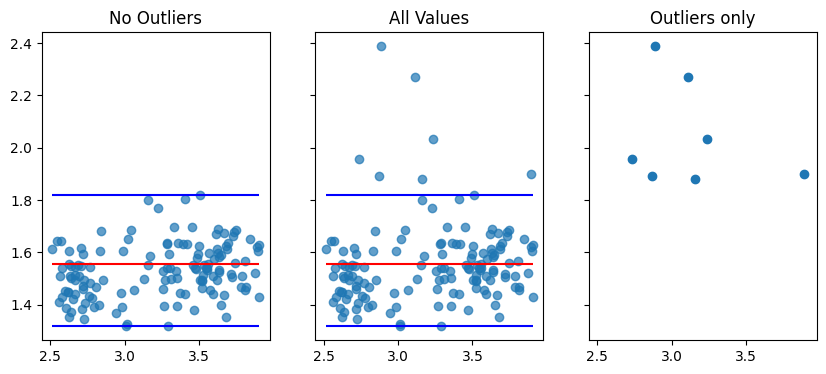

In [33]:
import matplotlib.pyplot as plt

##Prototyping

#Get data
df = pd.read_csv(fname)

#Defined variables (knobs and dials to tune results)
#These will be arguments when wrapping into a function
stratify_feat = 'Store'
x_feat = 'Fuel_Price'
y_feat = 'Weekly_Sales'
n_sigma = 2
n_segments = 100
feat_scales = [1,1e6]

#Generate secondary variables
#These are utilities used inside the function
unique_values = list(df[stratify_feat].unique())
unique_feat = unique_values[0] #REMOVE LATER

#Extract relevent data
x_scale, y_scale = feat_scales
unique_df = df[df[stratify_feat]==unique_feat].copy() #CHAGE LATER
unique_df = unique_df.drop([col for col in unique_df.columns if col not in [x_feat,y_feat]], axis=1)
unique_df[x_feat] = unique_df[x_feat]/x_scale
unique_df[y_feat] = unique_df[y_feat]/y_scale

#Get statistics
y_mean = unique_df[y_feat].mean()
x_mean = unique_df[x_feat].mean()
y_stdev = unique_df[y_feat].std()

#Split data into outliers by number of standard deviations (y feature)
outliers = unique_df[unique_df[y_feat] >= y_mean+n_sigma*y_stdev].copy()
inliers = unique_df[~(unique_df[y_feat] >= y_mean+n_sigma*y_stdev)].copy()

#Calculate Density
x_min_threshold,x_max_threshold = inliers[x_feat].min(),inliers[x_feat].max()
x_range_threshold = (x_max_threshold - x_min_threshold)
y_threshold_mean = inliers[y_feat].mean()
y_min_threshold,y_max_threshold = inliers[y_feat].min(),inliers[y_feat].max()
y_range_threshold = (y_max_threshold - y_min_threshold)
area_threshold = x_range_threshold*y_range_threshold
threshold_density = inliers.shape[1]/area_threshold #density result

#


#Plot for sanity check
fig,axs = plt.subplots(1,3,figsize=(10,4),sharex=True,sharey=True)
axs[0].scatter(x=inliers[x_feat],y=inliers[y_feat],alpha=0.7)
axs[0].hlines(y=y_mean,xmin=x_min_threshold,xmax=x_max_threshold,color='r')
axs[0].hlines(y=y_max_threshold,xmin=unique_df[x_feat].min(),xmax=unique_df[x_feat].max(),color='b')
axs[0].hlines(y=y_min_threshold,xmin=unique_df[x_feat].min(),xmax=unique_df[x_feat].max(),color='b')
axs[1].scatter(x=unique_df[x_feat],y=unique_df[y_feat],alpha=0.7)
axs[1].hlines(y=unique_df[y_feat].mean(),xmin=unique_df[x_feat].min(),xmax=unique_df[x_feat].max(),color='r')
axs[1].hlines(y=y_max_threshold,xmin=unique_df[x_feat].min(),xmax=unique_df[x_feat].max(),color='b')
axs[1].hlines(y=y_min_threshold,xmin=unique_df[x_feat].min(),xmax=unique_df[x_feat].max(),color='b')
axs[2].scatter(x=outliers[x_feat],y=outliers[y_feat])
axs[0].set_title('No Outliers')
axs[1].set_title('All Values')
axs[2].set_title('Outliers only')

fig.close()
plt.scatter(x=outliers[x_feat],y=outliers[y_feat])

In [33]:
def fuel_cost_function(df,x_feat,y_feat,stratify_feat,feat_scales,n_sigma=2,make_gif=False,output_fpath='/kaggle/working/'):
    '''
    Required packages:
                        numpy as np
                        pandas as pd
                        matplotlib.pyplot as plt <-- if make_gif == True
                        from PIL import Image,ImageDraw <-- if make_gif == True
    '''    
    #Make variables
    unique_values = list(df[stratify_feat].unique())
    x_scale, y_scale = feat_scales

    #Initialize storage
    result = {}
    if make_gif == True:
        outlier_global = []
        img_fnames = []
        #Calculate axes limits
        y_mean_all = df[y_feat].mean()/y_scale
        x_mean_all = df[x_feat].mean()/x_scale
        y_stdev_all = df[y_feat].std()/y_scale
        outliers_all = df[df[y_feat] >= (y_mean_all+y_stdev_all)]
        y_min_global,y_max_global = outliers_all[y_feat].min()/y_scale,outliers_all[y_feat].max()/y_scale#y-axis limits
        x_min_global,x_max_global = outliers_all[x_feat].min()/x_scale,outliers_all[x_feat].max()/x_scale#x-axis limits

    
    for i,unique_value in enumerate(unique_values):
        #Extract relevent data
        unique_df = df[df[stratify_feat]==unique_value].copy() #CHAGE LATER
        unique_df = unique_df.drop([col for col in unique_df.columns if col not in [x_feat,y_feat]], axis=1)
        unique_df[x_feat] = unique_df[x_feat]/x_scale
        unique_df[y_feat] = unique_df[y_feat]/y_scale
        
        
        #Get statistics
        y_mean = unique_df[y_feat].mean()
        x_mean = unique_df[x_feat].mean()
        y_stdev = unique_df[y_feat].std()
        
        #Split data into outliers by number of standard deviations (y feature)
        outliers = unique_df[unique_df[y_feat] >= y_mean+n_sigma*y_stdev].copy()
        inliers = unique_df[~(unique_df[y_feat] >= y_mean+n_sigma*y_stdev)].copy()
        
        #Calculate Density
        x_min_threshold,x_max_threshold = inliers[x_feat].min(),inliers[x_feat].max()
        x_range_threshold = (x_max_threshold - x_min_threshold)
        y_threshold_mean = inliers[y_feat].mean()
        y_min_threshold,y_max_threshold = inliers[y_feat].min(),inliers[y_feat].max()
        y_range_threshold = (y_max_threshold - y_min_threshold)
        area_threshold = x_range_threshold*y_range_threshold
        threshold_density = inliers.shape[1]/area_threshold #density result

        #Store outlier data and file names for plotting
        if make_gif == True:
            img_fnames.append(output_fpath+f"fuel_cost_{unique_value}.png")
            outlier_global.append(outliers)
            
    #Plot outlier data and make gif
    if make_gif == True:
        #Make plots and save
        for i,out in enumerate(outlier_global):
            plt.figure()
            ax = plt.gca()
            ax.set_xlim([x_min_global,x_max_global])
            ax.set_ylim([y_min_global,y_max_global])
            plt.scatter(x=out[x_feat],y=out[y_feat])
            ax.set_title(f"Outliers for Store {i+1}")
            plt.savefig(img_fnames[i])
            plt.close()

        #Make gif
        imgs = []
        for img_fname in img_fnames:
            with Image.open(img_fname) as img:
                imgs.append(img.copy())
        imgs[0].save(output_fpath+'fuel_cost_animation.gif',save_all=True, append_images=imgs[1:], duration=500, loop=0)
        return outlier_global
            


At this point the graphs I am generating aren't making shapes I can really make sense of the way I was hoping. So, instead of trying something that might not work, lets think of what I did and what can be done from here.

Let us assume that each point on a graph is neutral and does not "interact" with any other points through a "force". That is, they do not attract, repell, combine, or split. 

The first thing I did to this data set was split it into different stores. This is analagous to partitioning the data into seperate partitions that cannot interact with one another in any way. They cannot exchange energy or particles, and they do not influence each other's volumes in any way.

The next thing I did was to partition each partition by thresholding the points based on their distance (in standard deviations) from the mean. This is like two systems that can exchange particles. In statistical mechanics when a particle is exchanged between two systems it is because there is a chemical potential difference or a change in temperature. Just for argument's sake we can say that all data points in the universe will act as an infinite heat sink, which prevents the two sub-systems from exchanging heat energy. If this is the case, then a data point can only change from one sub system to another by way of a chemical potential $(\mu)$ shift. The thresholding (partitioning) of outliers was done by considering the number of standard deviations away from the mean. This means that the chemical potential of the system is related number of standard deviations $(\sigma)$ a data point is away from the mean of the distribution.

This is important because it allows us to define an energy for each outlier point based on its number of standard deviations away from the mean. Once we can define the energy of the system we can compare energies of systems to see how similar they are. In other words, $n\sigma$ is related to the Gibb's Free Energy and that free energy acts as an energy barrier preventing points from cross between the outlier and the inlier data sets. Furthermore, since energy is a scalar it makes comparisons of the systems computationally less expensive, though the trade off is that it won't let us talk about the features of the systems with as much depth. Another benefit of defining an energy of the system is that we can discuss the amount of work required to move a data point from the inliers group to the outliers group and we can also discuss the amount of work required to rearrange the data points inside the outlier "system" so that it resembles another system. From here, we can apply Bayesian statistics to get a metric that will allow the grouping of stores into different categories. 

In the future we could hypothetically use this metric to investigate a store and see what variables drive this metric and take action at the store or district level to correct things. Basically, it could give corporate management a set of knobs and dials they can turn to make an underperforming store's data look more like a high performing store's data. 

Doing this could also allow us to come up with physical constraints to the system such as local economic indicators, product positioning, pricing, and so forth. These indicators could then be used to develop a metric to see if opening a new store in an area is viable or if a store should be closed.

Since I am not an expert in this field, I will need to consult with a colleague who is.

In [29]:
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw

df = pd.read_csv(fname)

outliers = fuel_cost_function(df,x_feat='Fuel_Price',y_feat='Weekly_Sales',stratify_feat='Store',make_gif=True,feat_scales=[1,1e6])

In [31]:
!mkdir -p /kaggle/working/out
!mv *.png /kaggle/working/out
!mv *.gif /kaggle/working/out

In [34]:
!rm -rf /kaggle/working/*

In [32]:
import shutil
shutil.make_archive('/kaggle/working/fuel_cost', 'zip', '/kaggle/working/out')

'/kaggle/working/fuel_cost.zip'

In [ ]:
#Need sklearn V 1.3 to use hdbscan
!pip install scikit-learn==1.3.0 --force-reinstall --no-deps

import sklearn
print(sklearn.__version__)

In [ ]:
#Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import HDBSCAN


#Load data
df = pd.read_csv(fname)

#Extract store data
store_df = df[df['Store']==1].copy()
old_feats = ['Weekly_Sales','Unemployment','CPI','Fuel_Price']
new_feats = ['Weekly_Sales_Scaled','Unemployment_Scaled','CPI_Scaled','Fuel_Price_Scaled']

#Scale features, stack columns, make stack name pairs
store_df[new_feats] = StandardScaler().fit_transform(store_df[old_feats])
stacks = [np.column_stack((store_df['Weekly_Sales_Scaled'],store_df[feat])) for feat in new_feats if feat != 'Weekly_Sales_Scaled']
stack_names = [('Weekly_Sales',feat) for feat in old_feats if feat != 'Weekly_Sales']

#Initialize plot area
fig, axs = plt.subplots(3,1, figsize=(4,15))

###Tuning parameters###
cluster_epsilon = 0.1
min_cluster_size = 3
min_samples = 5

#Plot feature pairs and cluster the stacks
for i, (stack,ax) in enumerate(zip(stacks,axs)):

    #Cluster data stack
    hdbscan = HDBSCAN(min_cluster_size=min_cluster_size, cluster_selection_epsilon=cluster_epsilon, min_samples=min_samples)
    hdbscan.fit(stack)

    #Get cluster labels
    labels = hdbscan.labels_
    unique_labels = set(labels)
    
    #Initialize storage
    centroids = []
    
    #Iterate through labels to plot and get centroids
    for label in unique_labels:
        clusters = stacks[i][labels==label]
        if label == -1:
            label_name = 'Noise'
        else:
            color = plt.cm.tab20(label % 20)
            label_name = f"Cluster {label}"
            
        #Plot data in each clusters
        ax.scatter(clusters[:,0],clusters[:,1],s=20, c=[color], label=label_name)

        #Get centroids
        if label == -1:
            continue #Skips noise

        centroid = clusters.mean(axis=0)
        centroids.append(centroid)
        ax.plot(centroid[0],centroid[1], 'x', color='k', markersize=10, mew=2) #Plot centroid

    #Plot noise
    noise_mask = labels == -1
    noise = stacks[i][labels==-1]
    ax.scatter(noise[0,:], noise[1,:],color='k')

    
    


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import HDBSCAN

def get_clusters(
    store_df, feats, target, 
    figsize=(4,15), 
    save_plot=True, 
    plot_fname = '/kaggle/working/output.png',
    return_data=False, 
    cluster_epsilon=0.2, 
    min_cluster_size=3,
    min_samples=10
):
    '''
    Requires sklearn.preprocesing.StandardScaler, numpy, pandas, sklearn.cluster.HDBSCAN (version 1.3.0 and higher), and matplotlib.pyplot
    '''
    new_feats = [feat+'_Scaled' for feat in feats]
    if target not in feats:
        new_feats.append(target+'_Scaled')
        old_feats = feats + [target]
    else:
        old_feats = feats.copy()

    if return_data == True:
        data_dict = {}
        
    num_plots = len(old_feats)-1
    
    
    #Scale features, stack columns, and make stack name pairs
    store_df[new_feats] = StandardScaler().fit_transform(store_df[old_feats])
    stacks = [np.column_stack((store_df[target+'_Scaled'], store_df[feat+'_Scaled'])) for feat in old_feats if feat != target]
    stack_names = [(target, feat) for feat in old_feats if feat != target]

    fig, axs = plt.subplots(num_plots, 1,figsize=figsize)

    #Plot feature pairs and cluster the stacks
    for i, (stack,ax) in enumerate(zip(stacks,axs)):
        #Cluster data stack
        hdbscan = HDBSCAN(min_cluster_size=min_cluster_size, cluster_selection_epsilon=cluster_epsilon, min_samples=min_samples)
        hdbscan.fit(stack)
    
        #Get cluster labels
        labels = hdbscan.labels_
        unique_labels = set(labels)
        
        #Initialize storage
        centroids = []
            
        #Iterate through labels to plot and get centroids
        for label in unique_labels:
            clusters = stacks[i][labels==label]
            if label == -1:
                label_name = 'Noise'
            else:
                color = plt.cm.tab20(label % 20)
                label_name = f"Cluster {label}"
                
            #Plot data in each clusters
            ax.scatter(clusters[:,0],clusters[:,1],s=20, c=[color], label=label_name)
    
            #Get centroids
            if label == -1:
                continue #Skips noise
    
            centroid = clusters.mean(axis=0)
            centroids.append(centroid)
            ax.plot(centroid[0],centroid[1], 'x', color='k', markersize=10, mew=2) #Plot centroid
    
        #Plot noise
        noise_mask = labels == -1
        noise = stacks[i][labels==-1]
        

        if return_data == True:
            data_dict[f"Feature Pair {stack_names[i]}"] = {'scan':hdbscan,'labels':labels,'centroids':centroids}
        
    if save_plot == True:
        fig.savefig(plot_fname)
    if return_data == True:
        return fig, axs, data_dict
    else:
        return fig, axs

df = pd.read_csv(fname)

input_feats = ['CPI', 'Unemployment', 'Fuel_Price']

fig_1, axs_1, data_1 = get_clusters(df[df['Store']==1],feats=input_feats, target='Weekly_Sales',return_data=True)